In [1]:
import requests as rs
from bs4 import BeautifulSoup as bs

url = "https://www.kompas.com/global"
headers = {
    "User-Agent": "Mozilla/5.0"
}

respons = rs.get(url)
print(respons)

<Response [200]>


In [2]:
import pandas as pd 
res = rs.get(url, headers=headers)
soup = bs(respons.content, 'html.parser')

In [3]:
# Ambil semua artikel headline (misal di section tertentu)
hl_items = soup.find_all("div", class_="articleHL-item")

In [28]:
headline_utama = []

for item in hl_items:
    # Ambil link berita
    a_tag = item.find("a")
    link = a_tag["href"] if a_tag else "Link tidak ditemukan"

    # Request ke halaman berita untuk ambil detail
    try:
        wrap = item.find("div", class_="articleHL-wrap")
        box = wrap.find("div", class_="articleHL-box")
        post = box.find("div", class_="articlePost")

        # detail_res = rs.get(link, headers=headers)
        # detail_soup = bs(detail_res.text, 'html.parser')

        # Ambil title
        title_tag = box.find("h1", class_="articleTitle")
        title = title_tag.text.strip() if title_tag else "Judul tidak ditemukan"

        # Ambil subtitle
        subtitle_tag = post.find("div", class_="articlePost-subtitle")
        subtitle = subtitle_tag.text.strip() if subtitle_tag else "Subtitle tidak ditemukan"

        # Ambil date
        date_tag = post.find("div", class_="articlePost-date")
        date = date_tag.text.strip() if date_tag else "Tanggal tidak ditemukan"

        # Tampilkan
        # print("Judul   :", title)
        # print("Tanggal :", date)
        # print("Subjudul:", subtitle)
        # print("Link    :", link)
        # print("-" * 50)

        headline_utama.append({
            "Judul": title,
            "Tanggal": date,
            "Subjudul": subtitle,
            "Link": link
        })

    except Exception as e:
        print("Gagal ambil detail:", link)
        print("Error:", e)

head_df = pd.DataFrame(headline_utama)
head_df

,Judul,Tanggal,Subjudul,Link
0,Warga Gaza Tolak Skema Bantuan AS-Israel karen...,11 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/11/...


In [29]:
# Temukan container besar
container = soup.find("div", class_="articleHL-small clearfix --Grid")

headline_articles = []

# Cek kalau ketemu
if container:
    wraps = container.find_all("div", class_="articleItem")
    print(f"Jumlah artikel ditemukan: {len(wraps)}")

    for wrap in wraps:
        try:
            box = wrap.find("div", class_="articleItem-box")
            post = wrap.find("div", class_="articlePost")

            # Link
            a_tag = wrap.find("a")
            link = a_tag["href"] if a_tag else "Link tidak ditemukan"

            # Judul
            title_tag = box.find("h2", class_="articleTitle") if box else None
            title = title_tag.text.strip() if title_tag else "Judul tidak ditemukan"

            # Subjudul
            subtitle_tag = post.find("div", class_="articlePost-subtitle") if post else None
            subtitle = subtitle_tag.text.strip() if subtitle_tag else "Subtitle tidak ditemukan"

            # Tanggal
            date_tag = post.find("div", class_="articlePost-date") if post else None
            date = date_tag.text.strip() if date_tag else "Tanggal tidak ditemukan"

            # print("Judul   :", title)
            # print("Tanggal :", date)
            # print("Subjudul:", subtitle)
            # print("Link    :", link)
            # print("-" * 50)

            headline_articles.append({
                "Judul": title,
                "Tanggal": date,
                "Subjudul": subtitle,
                "Link": link
            })

        except Exception as e:
            print("Gagal parsing satu artikel:", e)
else:
    print("Container artikel tidak ditemukan.")

head_df_2 = pd.DataFrame(headline_articles)
head_df_2


Jumlah artikel ditemukan: 6


,Judul,Tanggal,Subjudul,Link
0,Putin: Ukraina Tak Pernah Tanggapi Usulan Genc...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
1,Agenda Padat Paus Leo XIV di Pekan Pertamanya ...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
2,"1.500 Warga Gaza Buta akibat Agresi Israel, Gu...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
3,Konflik India Vs Pakistan dan Luka Kolonial ya...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
4,Bill Gates Akan Sumbangkan Seluruh Kekayaannya...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
5,AS Sebut Israel Tak Berniat Akhiri Perang di G...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...


In [30]:
# Temukan container besar
section_container = soup.find("div", class_="articleList -list")

section_articles = []

if section_container:
    jumlah_artikel = section_container.find_all("div", class_="articleItem")
    print(f"Jumlah artikel ditemukan: {len(jumlah_artikel)}")

    for wrap in jumlah_artikel:
        try:
            box = wrap.find("div", class_="articleItem-box")
            post = wrap.find("div", class_="articlePost")

            # Link
            a_tag = wrap.find("a")
            link = a_tag["href"] if a_tag else "Link tidak ditemukan"

            # Judul
            title_tag = box.find("h2", class_="articleTitle") if box else None
            title = title_tag.text.strip() if title_tag else "Judul tidak ditemukan"

            # Subjudul
            subtitle_tag = post.find("div", class_="articlePost-subtitle") if post else None
            subtitle = subtitle_tag.text.strip() if subtitle_tag else "Subtitle tidak ditemukan"

            # Tanggal
            date_tag = post.find("div", class_="articlePost-date") if post else None
            date = date_tag.text.strip() if date_tag else "Tanggal tidak ditemukan"

            # print("Judul   :", title)
            # print("Tanggal :", date)
            # print("Subjudul:", subtitle)
            # print("Link    :", link)
            # print("-" * 50)

            # Simpan ke list sebagai dict
            section_articles.append({
                "Judul": title,
                "Tanggal": date,
                "Subjudul": subtitle,
                "Link": link
            })

        except Exception as e:
            print("Gagal parsing satu artikel:", e)

else:
    print("Container artikel tidak ditemukan.")

section_df = pd.DataFrame(section_articles)
section_df

Jumlah artikel ditemukan: 14


,Judul,Tanggal,Subjudul,Link
0,"Taliban Larang Catur di Afghanistan, Dianggap ...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
1,Pesawat di Inggris Gagal Terbang karena Pilot ...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
2,"Qatar Berencana Berikan ""Istana Terbang"" untuk...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
3,"Negosiasi AS-China Capai Kemajuan, Sinyal Pera...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
4,"Merasa Dimanipulasi, Trump Putus Kontak Langsu...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
5,"Zelensky Tantang Putin Bertemu di Turkiye, Ter...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
6,[KABAR DUNIA SEPEKAN] Paus Baru Terpilih Pakai...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
7,"Dari Vatikan, Paus Leo XIV Serukan Perdamaian ...",11 Mei 2025,Internasional,https://internasional.kompas.com/read/2025/05/...
8,"AS-China Mulai Berunding, Ini Alasannya Baru T...",11 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/11/...
9,Gajah Muda Mati Tertabrak Truk Saat Menyeberan...,11 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/11/...


In [33]:
# Temukan container besar
most_container = soup.find("div", class_="mostList -mostlist -mostArticle most_type2")

most_articles = []

if most_container:
    jumlah_artikel = most_container.find_all("div", class_="mostItem")
    print(f"Jumlah artikel ditemukan: {len(jumlah_artikel)}")

    for wrap in jumlah_artikel:
        try:
            box = wrap.find("div", class_="mostItem-box")
            post = wrap.find("div", class_="articlePost")

            # Link
            a_tag = wrap.find("a")
            link = a_tag["href"] if a_tag else "Link tidak ditemukan"

            # Judul
            title_tag = box.find("h2", class_="mostItem-title") if box else None
            title = title_tag.text.strip() if title_tag else "Judul tidak ditemukan"

            # Subjudul
            subtitle_tag = post.find("div", class_="mostItem-subtitle") if post else None
            subtitle = subtitle_tag.text.strip() if subtitle_tag else ""

            # Tanggal
            date_tag = post.find("div", class_="mostItem-date") if post else None
            date = date_tag.text.strip() if date_tag else ""

            # print("Judul   :", title)
            # print("Tanggal :", date)
            # print("Subjudul:", subtitle)
            # print("Link    :", link)
            # print("-" * 50)

            # Simpan ke list sebagai dict
            most_articles.append({
            "Judul": title,
            "Tanggal": date,
            "Subjudul": subtitle,
            "Link": link
            })

        except Exception as e:
            print("Gagal parsing satu artikel:", e)

else:
    print("Container artikel tidak ditemukan.")

    # Ubah ke DataFrame
most_df = pd.DataFrame(most_articles)
most_df

Jumlah artikel ditemukan: 10


,Judul,Tanggal,Subjudul,Link
0,Warga Gaza Tolak Skema Bantuan AS-Israel karen...,,,https://www.kompas.com/global/read/2025/05/11/...
1,Gajah Muda Mati Tertabrak Truk Saat Menyeberan...,,,https://www.kompas.com/global/read/2025/05/11/...
2,"Merasa Dimanipulasi, Trump Putus Kontak Langsu...",,,https://www.kompas.com/global/read/2025/05/12/...
3,"AS-China Mulai Berunding, Ini Alasannya Baru T...",,,https://www.kompas.com/global/read/2025/05/11/...
4,"Negosiasi AS-China Capai Kemajuan, Sinyal Pera...",,,https://www.kompas.com/global/read/2025/05/12/...
5,Paus Leo XIV Serukan Perdamaian Dunia dari Bal...,,,https://www.kompas.com/global/read/2025/05/11/...
6,"Gencatan Senjata India-Pakistan Masih Rentan, ...",,,https://www.kompas.com/global/read/2025/05/11/...
7,"Zelensky Tantang Putin Bertemu di Turkiye, Ter...",,,https://www.kompas.com/global/read/2025/05/12/...
8,"Putin Tawarkan Perundingan Damai ke Ukraina, Z...",,,https://www.kompas.com/global/read/2025/05/11/...
9,"Jam 17.00 WIB, Paus Leo XIV Akan Sapa Umat Lew...",,,https://www.kompas.com/global/read/2025/05/11/...


In [34]:
side_lists = soup.find_all("div", class_="sideArticleList")

# Buat list penampung
data_side_articles = []

# print(f"Jumlah sideArticleList ditemukan: {len(side_lists)}")

for idx, side_list in enumerate(side_lists, 1):
    # print(f"\n=== Side Article List #{idx} ===")
    articles = side_list.find_all("div", class_="articleItem")
    # print(f"Jumlah artikel di list #{idx}: {len(articles)}")

    for article in articles:
        try:
            a_tag = article.find("a")
            link = a_tag["href"] if a_tag else "Link tidak ditemukan"
            title = a_tag.text.strip() if a_tag else "Judul tidak ditemukan"
            
            # print("Judul :", title)
            # print("Link  :", link)
            # print("-" * 30)

            # Simpan ke list sebagai dict
            data_side_articles.append({
            "Judul": title,
            "Tanggal": date,
            "Subjudul": subtitle,
            "Link": link
            })
        except Exception as e:
            print("Gagal parsing artikel side:", e)

# Ubah ke DataFrame
side_df = pd.DataFrame(data_side_articles)

# Lihat hasil
side_df


,Judul,Tanggal,Subjudul,Link
0,"Tabir Surya, Cara Aman Lindungi Kulit dari Sin...",,,http://www.kompas.com/jawa-timur/read/2025/05/...
1,Soal Barak Militer Jadi Tempat Pendidikan Kara...,,,http://www.kompas.com/jawa-timur/read/2025/05/...
2,Kisah Tiga Paus dari Afrika Mengubah Wajah Kek...,,,http://www.kompas.com/global/read/2025/05/06/1...
3,Konklaf Berpeluang Tunjuk Paus Baru dari Negar...,,,http://www.kompas.com/global/read/2025/05/05/1...
4,Rusia Diisukan Bakal Tempatkan Jet Militernya ...,,,http://www.kompas.com/global/read/2025/05/01/1...
5,"Foto-foto Paus Fransiskus Muda, Bernama Asli J...",,,http://www.kompas.com/global/read/2025/04/23/1...
6,"Friedrich Merz Kanselir Baru Jerman, Cetak Sej...",,,http://www.kompas.com/global/read/2025/05/07/2...
7,Orang Indonesia Disebut Paling Bahagia di Duni...,,,http://www.kompas.com/global/read/2025/05/05/1...
8,"Israel Blokir Bantuan, Situasi di Gaza Makin M...",,,http://www.kompas.com/global/read/2025/05/05/1...


In [51]:
df_all = pd.concat([head_df, head_df_2, section_df, side_df, most_df], ignore_index=True)
print("Jumlah Baris Data: ", len(df_all))
df_all

Jumlah Baris Data:  40


,Judul,Tanggal,Subjudul,Link
0,Warga Gaza Tolak Skema Bantuan AS-Israel karen...,11 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/11/...
1,Putin: Ukraina Tak Pernah Tanggapi Usulan Genc...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
2,Agenda Padat Paus Leo XIV di Pekan Pertamanya ...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
3,"1.500 Warga Gaza Buta akibat Agresi Israel, Gu...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
4,Konflik India Vs Pakistan dan Luka Kolonial ya...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
5,Bill Gates Akan Sumbangkan Seluruh Kekayaannya...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
6,AS Sebut Israel Tak Berniat Akhiri Perang di G...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
7,"Taliban Larang Catur di Afghanistan, Dianggap ...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
8,Pesawat di Inggris Gagal Terbang karena Pilot ...,12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...
9,"Qatar Berencana Berikan ""Istana Terbang"" untuk...",12 Mei 2025,Global,https://www.kompas.com/global/read/2025/05/12/...


In [41]:
df_all.to_csv("hasil_scraping_kompas.csv", index=False, encoding='utf-8-sig')

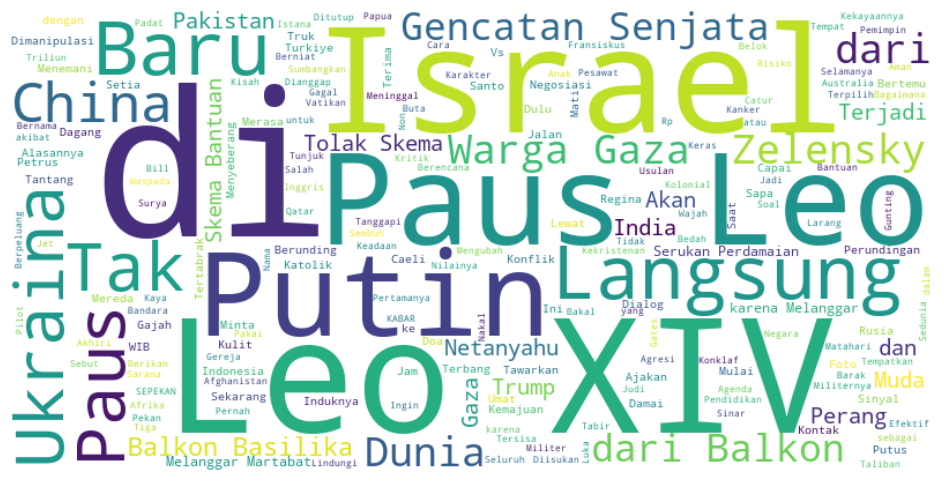

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabung semua judul jadi satu string
text = " ".join(df_all["Judul"].dropna())

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.title("Word Cloud dari Judul Berita", fontsize=16)
plt.show()
